In [1]:
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)
import matplotlib.pyplot as pl
import numpy as np
import plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [2]:
data=pd.read_csv('GrammarandProductReviews.csv')

In [3]:
data.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [4]:
data.shape

(71044, 25)

In [5]:
data.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [6]:
data.dtypes

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating            int64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
upc                      object
dtype: object

In [7]:
data=data.dropna(subset=['reviews.text'])
data1=data.copy()

In [8]:
data.shape

(71008, 25)

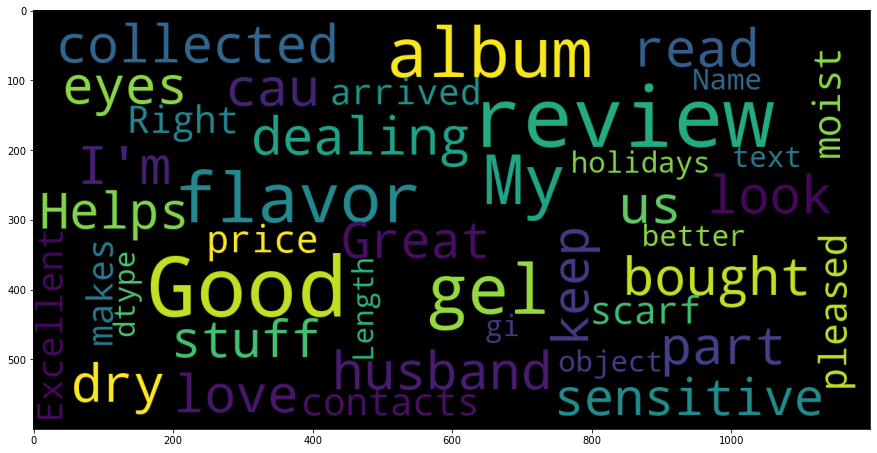

In [9]:
def showWordcloud(data):
    wordcloud=WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200,
                        max_font_size=40,
                        scale=3,
                        random_state=None
                        ).generate(str(data))
    
    
    pl.figure(figsize=(15,10))
    pl.imshow(wordcloud)
    pl.show()
    return wordcloud
    
showWordcloud(data['reviews.text'])

<IPython.core.display.Javascript object>

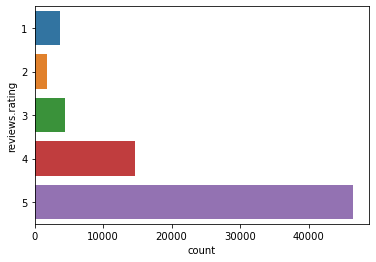

In [10]:
sns.countplot(y=data['reviews.rating'])

In [11]:
ratings=data['reviews.rating'].value_counts().reset_index().copy()
ratings.columns=['Ratings','Counts']

ratings

,Ratings,Counts
0,5,46516
1,4,14592
2,3,4367
3,1,3701
4,2,1832


In [12]:
trace=go.Bar(x=ratings['Counts'],y=ratings['Ratings'],orientation='h',
            marker=dict(color=ratings['Counts'])
            )
layout=go.Layout(dict(title='Ratings Plot'))
data=[trace]
fig=go.Figure(data=data,layout=layout)

py.iplot(fig)

In [13]:
data1['review_len']=data1['reviews.text'].apply(len)

In [14]:
data1.head(3)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,review_len
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,201
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391,62
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391,12


In [15]:
data1['review_len'].describe()

count    71008.000000
mean       208.992001
std        225.449415
min          2.000000
25%         78.000000
50%        136.000000
75%        254.000000
max       5865.000000
Name: review_len, dtype: float64

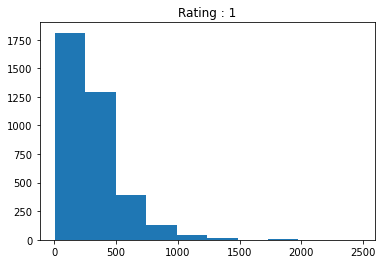

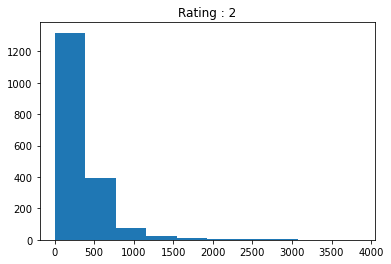

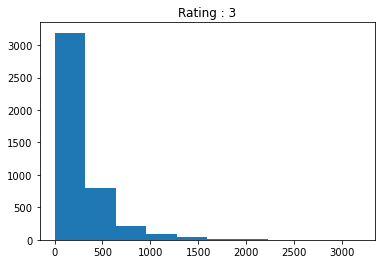

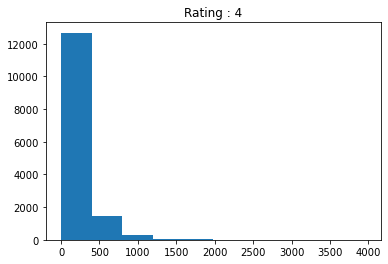

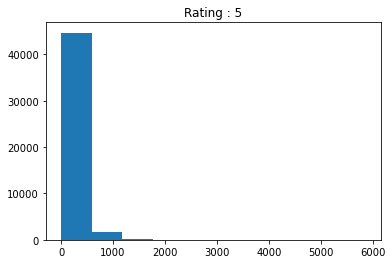

In [16]:
rating=[1,2,3,4,5]
for i in rating:
    temp=data1[data1['reviews.rating']==i]['review_len']
    pl.hist(temp)
    pl.title('Rating : '+str(i))
    pl.show()
    
    

In [17]:
data1.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc',
       'review_len'],
      dtype='object')

<IPython.core.display.Javascript object>

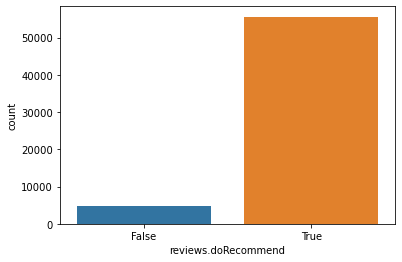

In [18]:
# data1['reviews.doRecommend'][data1['reviews.doRecommend']==]
sns.countplot(data1['reviews.doRecommend'])

In [19]:
data1['reviews.didPurchase'].fillna('Review N/A',inplace=True)

<IPython.core.display.Javascript object>

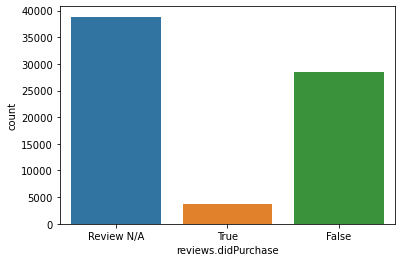

In [20]:
sns.countplot(data1['reviews.didPurchase'])

<IPython.core.display.Javascript object>

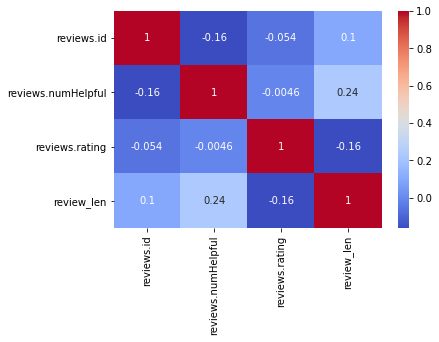

In [21]:
sns.heatmap(data1.corr(),annot=True,cmap='coolwarm')

In [22]:
from sklearn.model_selection import cross_val_score,train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
all_text=data1['reviews.text']
train_text=data1['reviews.text']
y=data1['reviews.rating']

In [24]:
word_vectorizer=TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)


In [25]:
word_vectorizer.fit(all_text)

TfidfVectorizer(max_features=10000, stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

In [26]:
train_word_features=word_vectorizer.transform(train_text)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(train_word_features,y,
                                              test_size=.3)

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
classifier.score(X_train,y_train),classifier.score(X_test,y_test)

(0.9977869429634846, 0.7227151105478101)

In [29]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=10000)
classifier.fit(X_train,y_train)
classifier.score(X_train,y_train),classifier.score(X_test,y_test)

(0.7522985615129263, 0.70905506266723)

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
classifier.score(X_train,y_train),classifier.score(X_test,y_test)

(0.9977869429634846, 0.640801765009623)

In [31]:
import xgboost as xgb
classifier=xgb.XGBClassifier()
classifier.fit(X_train,y_train)
classifier.score(X_train,y_train),classifier.score(X_test,y_test)

(0.7763404084096167, 0.709102004412524)

In [32]:
data1['sentiment']=data1['reviews.rating']<4

In [33]:
X_train,X_test,y_train,y_test=train_test_split(data1['reviews.text'],
                                               data1['sentiment'],
                                              test_size=.3)

In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [35]:
max_words=20000
X_train=X_train.astype(str)
X_test=X_test.astype(str)


tokenizer=Tokenizer(num_words=max_words,char_level=False)
tokenizer.fit_on_texts(X_train)
sequences=tokenizer.texts_to_sequences(X_train)
sequences_test=tokenizer.texts_to_sequences(X_test)
word_index=tokenizer.word_index

In [36]:
len(word_index)

24656

In [37]:
max_seq_length=200
X_train=pad_sequences(sequences,maxlen=max_seq_length)
X_test=pad_sequences(sequences_test,maxlen=max_seq_length)
X_train.shape,X_test.shape

((49705, 200), (21303, 200))

In [38]:
model=Sequential()
model.add(Embedding(max_words,128))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1,activation='sigmoid'))

In [39]:
from keras.utils.vis_utils import plot_model

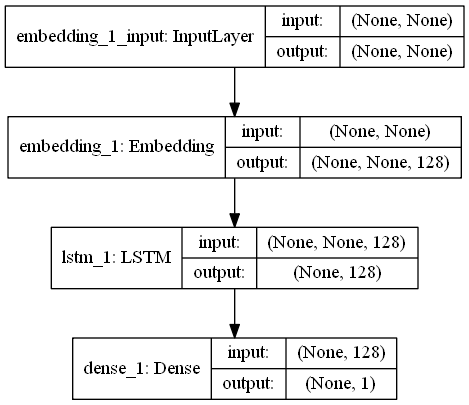

In [40]:
plot_model(model, to_file='model_plot_MNIST_9.5K.png', show_shapes=True, show_layer_names=True)

In [43]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(X_test, y_test))

C:\Users\rissu\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 49705 samples, validate on 21303 samples
Epoch 1/10
49705/49705 [==============================] - 63s 1ms/step - loss: 0.2771 - accuracy: 0.8942 - val_loss: 0.2269 - val_accuracy: 0.9155
Epoch 2/10
49705/49705 [==============================] - 75s 2ms/step - loss: 0.1969 - accuracy: 0.9255 - val_loss: 0.2183 - val_accuracy: 0.9167
Epoch 3/10
49705/49705 [==============================] - 69s 1ms/step - loss: 0.1681 - accuracy: 0.9380 - val_loss: 0.2203 - val_accuracy: 0.9194
Epoch 4/10
49705/49705 [==============================] - 67s 1ms/step - loss: 0.1482 - accuracy: 0.9468 - val_loss: 0.2190 - val_accuracy: 0.9190
Epoch 5/10
49705/49705 [==============================] - 59s 1ms/step - loss: 0.1250 - accuracy: 0.9560 - val_loss: 0.2351 - val_accuracy: 0.9151
Epoch 6/10
49705/49705 [==============================] - 60s 1ms/step - loss: 0.1080 - accuracy: 0.9629 - val_loss: 0.2434 - val_accuracy: 0.9208
Epoch 7/10
49705/49705 [==============================] - 60s 1ms/st

In [44]:
import matplotlib.pyplot as pl

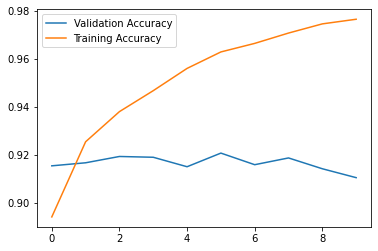

In [49]:
pl.plot(history.history['val_accuracy'],label='Validation Accuracy')
pl.plot(history.history['accuracy'],label='Training Accuracy')
pl.legend()
pl.show()

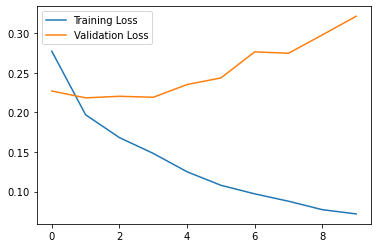

In [51]:
pl.plot(history.history['loss'],label='Training Loss')
pl.plot(history.history['val_loss'],label='Validation Loss')
pl.legend()
pl.show()